# Import de pacotes

In [1]:
from scipy.stats import binom, nbinom, poisson, uniform, expon, norm 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import statistics as st
from scipy import stats
from scipy.stats import t,norm
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obter Dataset

In [13]:
!wget https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/campeonato-brasileiro-full.csv?raw=true

--2020-12-17 00:32:18--  https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/campeonato-brasileiro-full.csv?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Andrewsas/trabalho-fundamentos-cid/raw/master/data/campeonato-brasileiro-full.csv [following]
--2020-12-17 00:32:18--  https://github.com/Andrewsas/trabalho-fundamentos-cid/raw/master/data/campeonato-brasileiro-full.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Andrewsas/trabalho-fundamentos-cid/master/data/campeonato-brasileiro-full.csv [following]
--2020-12-17 00:32:18--  https://raw.githubusercontent.com/Andrewsas/trabalho-fundamentos-cid/master/data/campeonato-brasileiro-full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.

##Abrir arquivo

In [20]:
#renomear arquivo
!mv campeonato-brasileiro-full.csv?raw=true campeonato-brasileiro-full.csv

#Ler arquivo
data = pd.read_csv('./campeonato-brasileiro-full.csv', delimiter=",")

data

mv: cannot stat 'campeonato-brasileiro-full.csv?raw=true': No such file or directory


,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,17:00,Domingo,2019-12-08,Goiás,Grêmio,Goiás,38ª Rodada,Serra Dourada,3,2,GO,RS,GO
7935,17:00,Domingo,2019-12-08,Internacional,Atlético-MG,Internacional,38ª Rodada,Beira Rio,2,1,RS,MG,RS
7936,17:00,Domingo,2019-12-08,Cruzeiro,Palmeiras,Palmeiras,38ª Rodada,Mineirão,0,2,MG,SP,SP
7937,17:00,Domingo,2019-12-08,Santos,Flamengo,Santos,38ª Rodada,Vila Belmiro,4,0,SP,RJ,SP


#Estatísticas de Gols

##Média

In [30]:
# Média
print('Média aritmética de Gols de Clubes Mandantes: ', round(st.mean(data['Clube 1 Gols']),3))
print('Média aritmética de Gols de Clubes Visitantes: ', round(st.mean(data['Clube 2 Gols']),3))


Média aritmética de Gols de Clubes Mandantes:  1.597
Média aritmética de Gols de Clubes Visitantes:  1.053


##Mediana

In [33]:
# Mediana
print('Mediana de Gols de Clubes Mandantes: ', st.median(data['Clube 1 Gols']))
print('Mediana de Gols de Clubes Visitantes: ', st.median(data['Clube 2 Gols']))

Mediana de Gols de Clubes Mandantes:  1
Mediana de Gols de Clubes Visitantes:  1


##Moda

In [34]:
# Moda
print('Moda Gols de Clubes Mandantes: ', st.mode(data['Clube 1 Gols']))
print('Moda Gols de Clubes Visitantes: ', st.mode(data['Clube 2 Gols']))

Moda Gols de Clubes Mandantes:  1
Moda Gols de Clubes Visitantes:  1


##Variância e Desvio Padrão

In [36]:
# Variancia
print('Variancia Gols de Clubes Mandantes: ', round(st.pvariance(data['Clube 1 Gols']),3))
print('Desvio Gols de Clubes Mandantes: ', round(st.pstdev(data['Clube 1 Gols']),3))
print('\n')
print('Variancia Gols de Clubes Visitantes:', round(st.variance(data['Clube 2 Gols']),3))
print('Desvio Gols de Clubes Visitantes: ', round(st.pstdev(data['Clube 2 Gols']),3))

Variancia Gols de Clubes Mandantes:  1.566
Desvio Gols de Clubes Mandantes:  1.251


Variancia Gols de Clubes Visitantes: 1.081
Desvio Gols de Clubes Visitantes:  1.04


##Coeficiente de Variação

In [37]:
# Coeficiente de variação

def cv(n):
  return round(100*st.stdev(n)/st.mean(n), 2)

print('Coeficiente Mandantes: ', cv(data['Clube 1 Gols']))
print('Coeficiente Visitantes: ', cv(data['Clube 2 Gols']))

Coeficiente Mandantes:  78.37
Coeficiente Visitantes:  98.78


##Quartis

In [38]:
# Quartil

print('Quartil Mandante: ', np.quantile(data['Clube 1 Gols'], [0, 0.25, 0.5, 0.75, 1]))
print('Quartil Visitante: ', np.quantile(data['Clube 2 Gols'], [0, 0.25, 0.5, 0.75, 1]))

Quartil Mandante:  [0. 1. 1. 2. 7.]
Quartil Visitante:  [0. 0. 1. 2. 7.]


##Describe

Mandantes

In [39]:
stats.describe(data['Clube 1 Gols'])

DescribeResult(nobs=7939, minmax=(0, 7), mean=1.5968006046101524, variance=1.5659308056635295, skewness=0.78700727276455, kurtosis=0.5524919467199347)

Visitantes

In [40]:
stats.describe(data['Clube 2 Gols'])

DescribeResult(nobs=7939, minmax=(0, 7), mean=1.0525255069908048, variance=1.0810149739965775, skewness=1.0141576080837886, kurtosis=1.1642516688194249)

##Boxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mandantes')

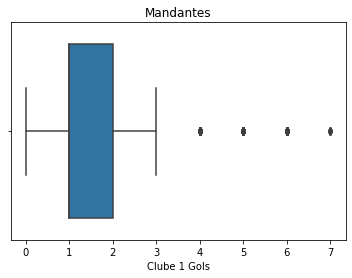

In [41]:
sns.boxplot(data['Clube 1 Gols']).set_title("Mandantes")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visitantes')

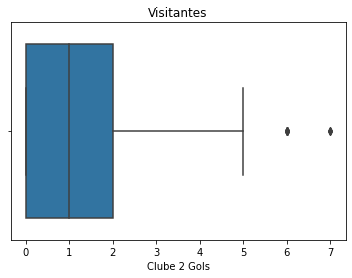

In [42]:
sns.boxplot(data['Clube 2 Gols']).set_title("Visitantes")